<a href="https://colab.research.google.com/github/Redwolf0023/AutoMLvsBayesian/blob/main/BioMechanical_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download and install the dependencies
!sudo apt-get install swig -y
!pip install Cython numpy
!pip install scikit-learn
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 0s (2,801 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline


In [ ]:
#import the libraires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# import input file as a dataset
df = pd.read_csv('column_2C_weka.csv')

In [ ]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
# initialise the cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9ku50215
  JVM stdout: /tmp/tmp9ku50215/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9ku50215/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_rvptja
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# parse the dataset
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target_col = data.columns[-1]
feature_col = data.columns[:-1]
data[target_col] = data[target_col].asfactor()

In [ ]:
train, test, validation = data.split_frame(ratios=[0.8, 0.15], seed = 12)

In [ ]:
# initialise and train the model
model = H2OAutoML(exclude_algos = ["GBM"],max_models=5, seed = 1234,sort_metric="accuracy")
model.train(x = feature_col, y = target_col, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_4_20230818_113254


Model Summary: 
    number_of_trees
--  -----------------
    33

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10346841524356122
RMSE: 0.3216650668685694
LogLoss: 0.3373112764761171
Mean Per-Class Error: 0.17924821373097236
AUC: 0.91787045666356
AUCPR: 0.8493816155906732
Gini: 0.8357409133271201

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.480416476726532
          Abnormal    Normal    Error    Rate
--------  ----------  --------  -------  ------------
Abnormal  161         13        0.0747   (13.0/174.0)
Normal    21          53        0.2838   (21.0/74.0)
Total     182         66        0.1371   (34.0/248.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.480416     0.757143  43
max f2                       0.138864     0.855107  81
max f0point5                 0.568048     0.839416  32
max accuracy                 0.568048     0.870968  32
max precision                0.890788     1         0
max recall                   0.0395883    1         118
max specificity              0.890788     1         0
max absolute_mcc             0.568048     0.682706  32
max min_per_class_accuracy   0.316135     0.810811  54
max mean_per_class_accuracy  0.167904     0.840789  73
max tns                      0.890788     174       0
max fns                      0.890788     71        0
max fps                      0.0129086    174       125
max tps                      0.0395883    74        118
max tnr                      0.890788     1         0
max fnr                      0.890788     0.959459  0
max fpr                      0.0129086    1         125
max tpr                      0.0395883    1         118

Gains/Lift Table: Avg response rate: 29.84 %, avg score: 28.80 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0120968                   0.887084           3.35135    3.35135            1                0.890788   1                           0.890788            0.0405405       0.0405405                  235.135   235.135            0.0405405
2        0.0201613                   0.869484           3.35135    3.35135            1                0.877879   1                           0.885625            0.027027        0.0675676                  235.135   235.135            0.0675676
3        0.0322581                   0.840875           3.35135    3.35135            1                0.861519   1                           0.876585            0.0405405       0.108108                   235.135   235.135            0.108108
4        0.0403226                   0.797909           3.35135    3.35135            1                0.819646   1                           0.865197            0.027027        0.135135                   235.135   235.135            0.135135
5        0.0524194                   0.783561           3.35135    3.35135            1                0.79254    1                           0.84843             0.0405405       0.175676                   235.135   235.135            0.175676
6        0.125                       0.757916           2.79279    3.02703            0.833333         0.763674   0.903226                    0.799217            0.202703        0.378378                   179.279   202.703            0.361137
7        0.153226                    0.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_1_20230818_110759,0.953177,0.423038,0.936415,0.062709,0.377562,0.142553,280,0.103877,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_110759,0.948161,0.364547,0.937616,0.0794314,0.338325,0.114464,3283,0.457725,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230818_110759,0.944816,0.365232,0.931647,0.0794314,0.337771,0.114089,4001,0.540155,StackedEnsemble
GBM_4_AutoML_1_20230818_110759,0.941472,0.412863,0.923876,0.0986622,0.373112,0.139212,311,0.103409,GBM
DRF_1_AutoML_1_20230818_110759,0.938963,0.388265,0.930234,0.120401,0.356965,0.127424,621,0.093723,DRF
GLM_1_AutoML_1_20230818_110759,0.938127,0.38649,0.929399,0.101171,0.353131,0.124701,120,0.09446,GLM
XRT_1_AutoML_1_20230818_110759,0.938127,0.404082,0.920052,0.0819398,0.361121,0.130408,225,0.096905,DRF
GBM_2_AutoML_1_20230818_110759,0.928094,0.428165,0.918204,0.0986622,0.372811,0.138988,573,0.289761,GBM
XGBoost_2_AutoML_1_20230818_110759,0.928094,0.421829,0.897283,0.0794314,0.373029,0.13915,1303,0.103527,XGBoost
XGBoost_3_AutoML_1_20230818_110759,0.921405,0.434935,0.900773,0.120401,0.376912,0.142063,413,0.08911,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_110759

,Abnormal,Normal,Error,Rate
Abnormal,23.0,3.0,0.1154,(3.0/26.0)
Normal,1.0,22.0,0.0435,(1.0/23.0)
Total,24.0,25.0,0.0816,(4.0/49.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

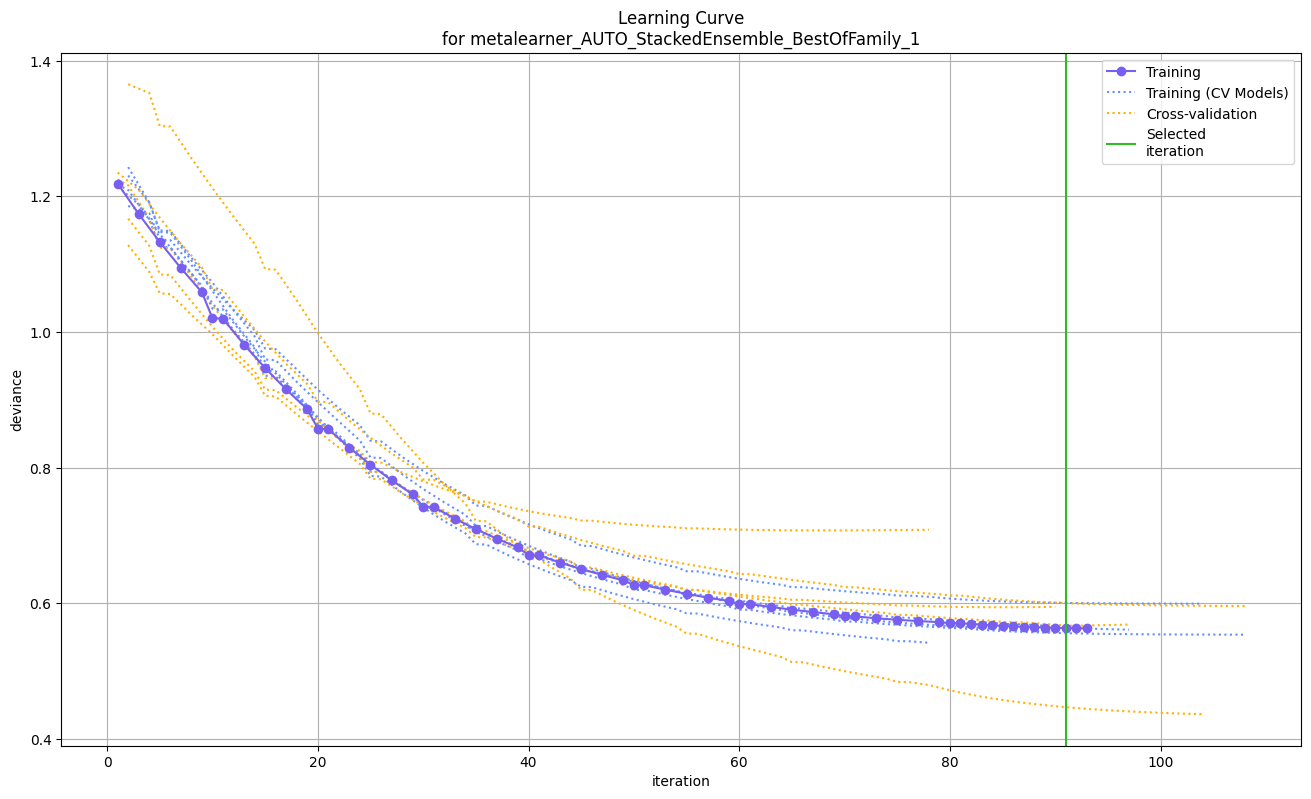

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

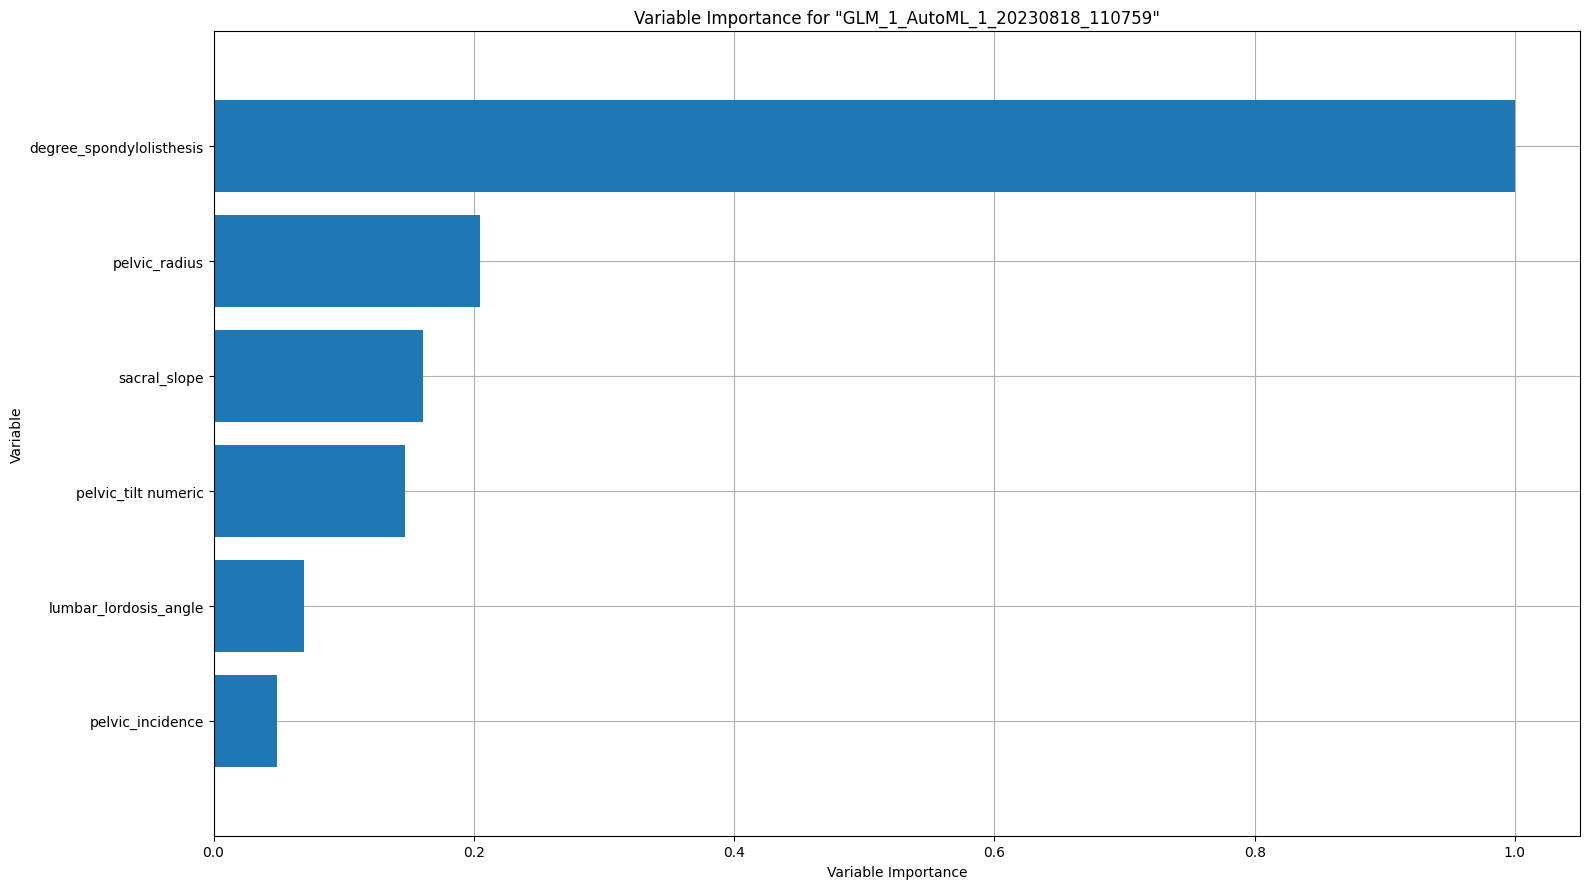

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

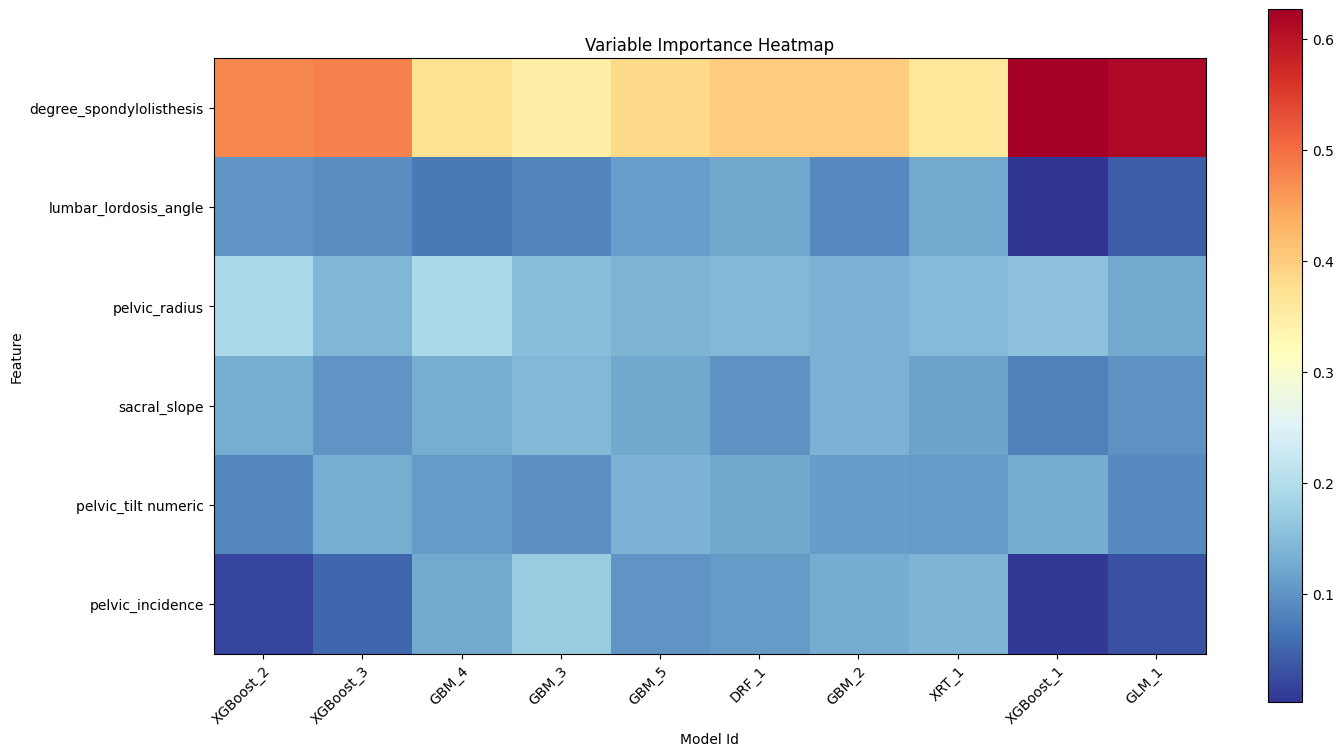

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

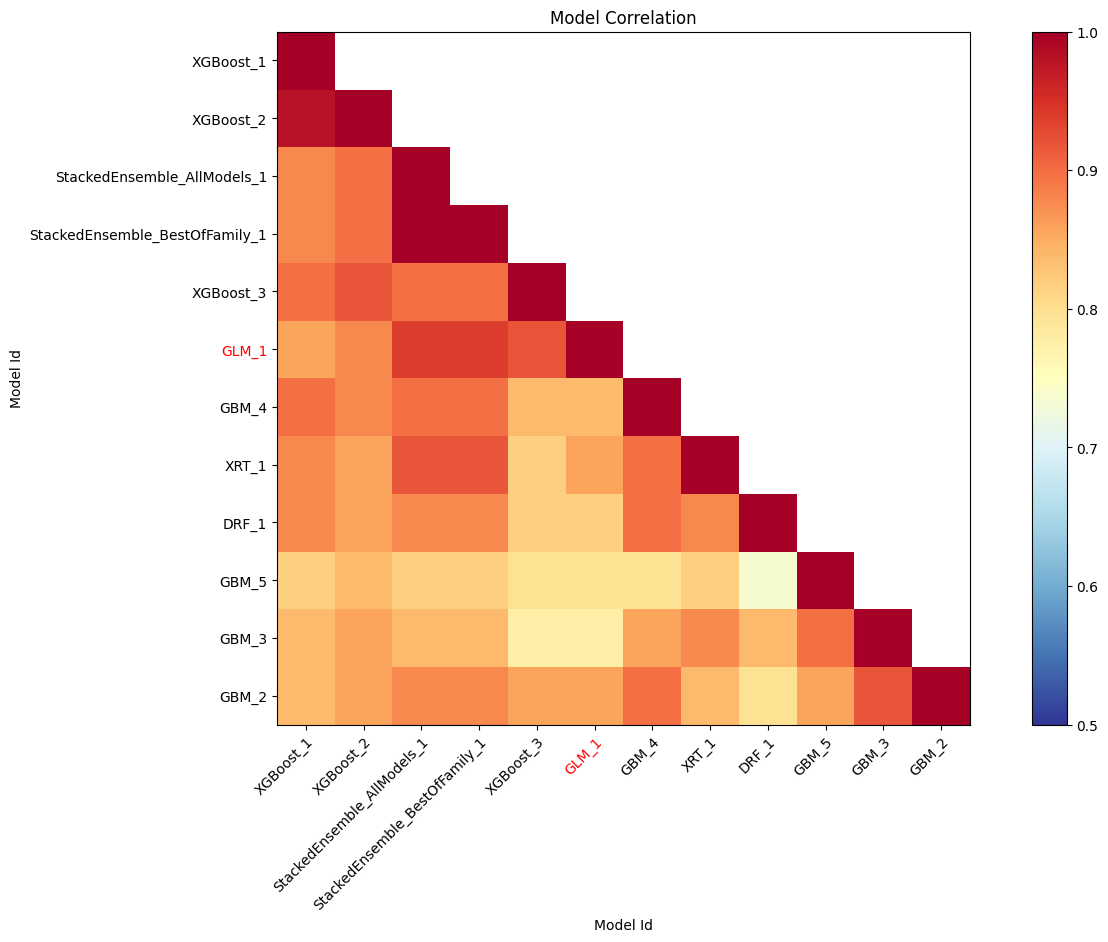

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

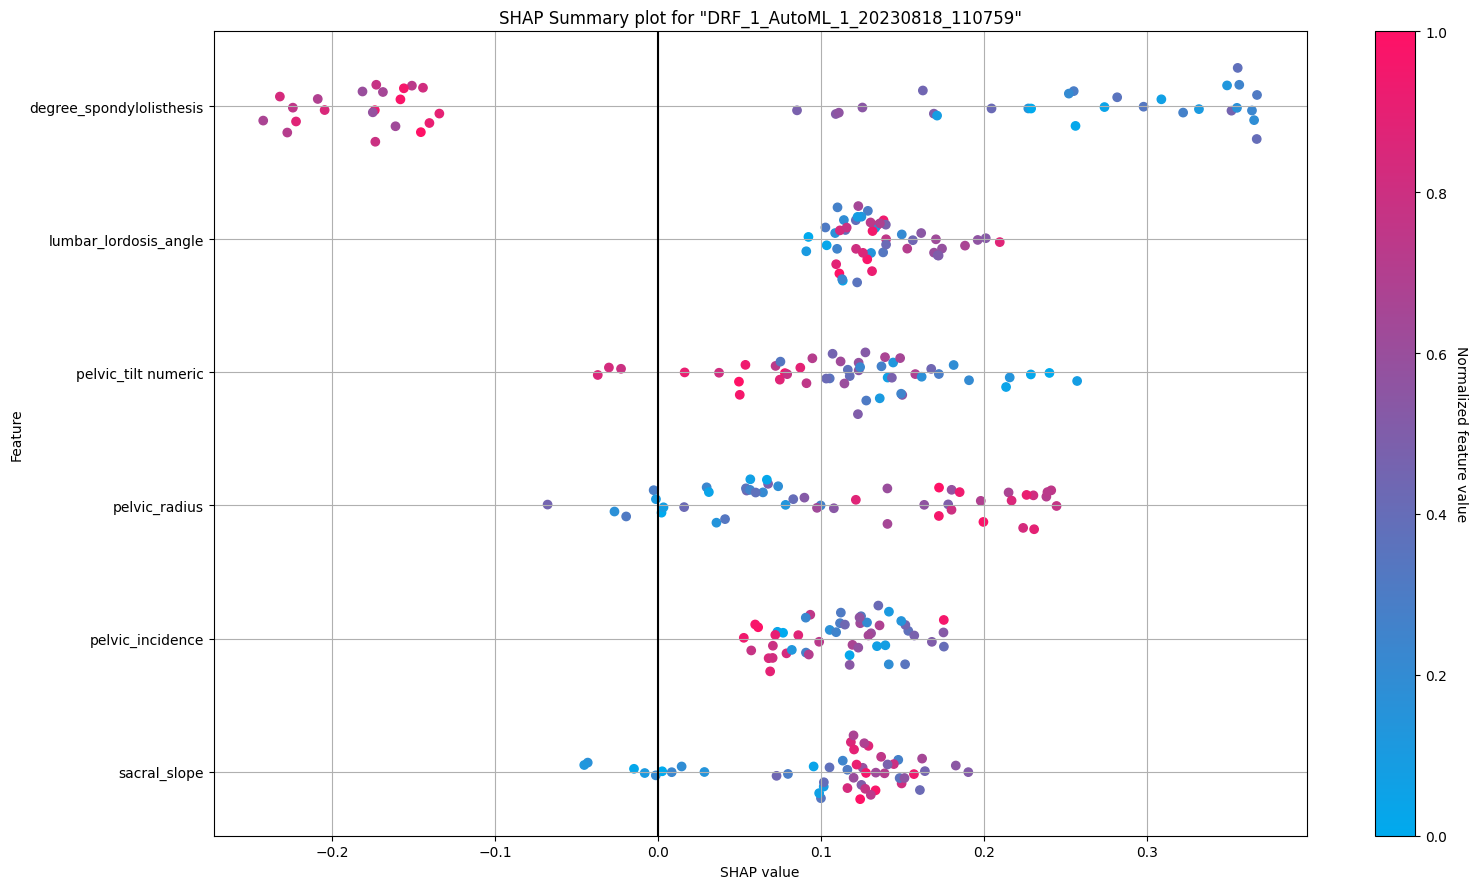

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

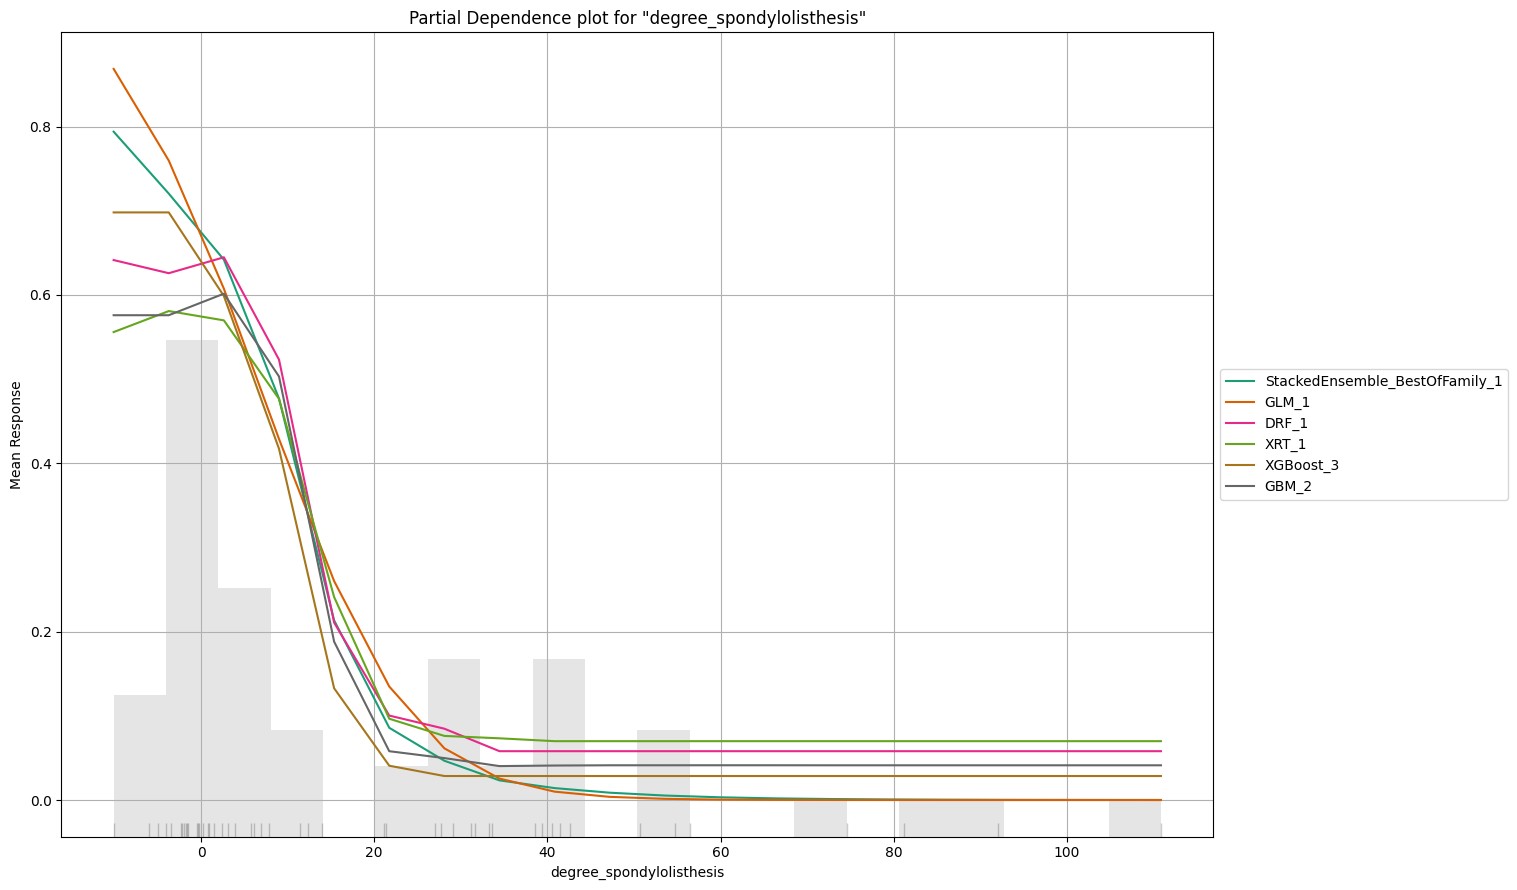

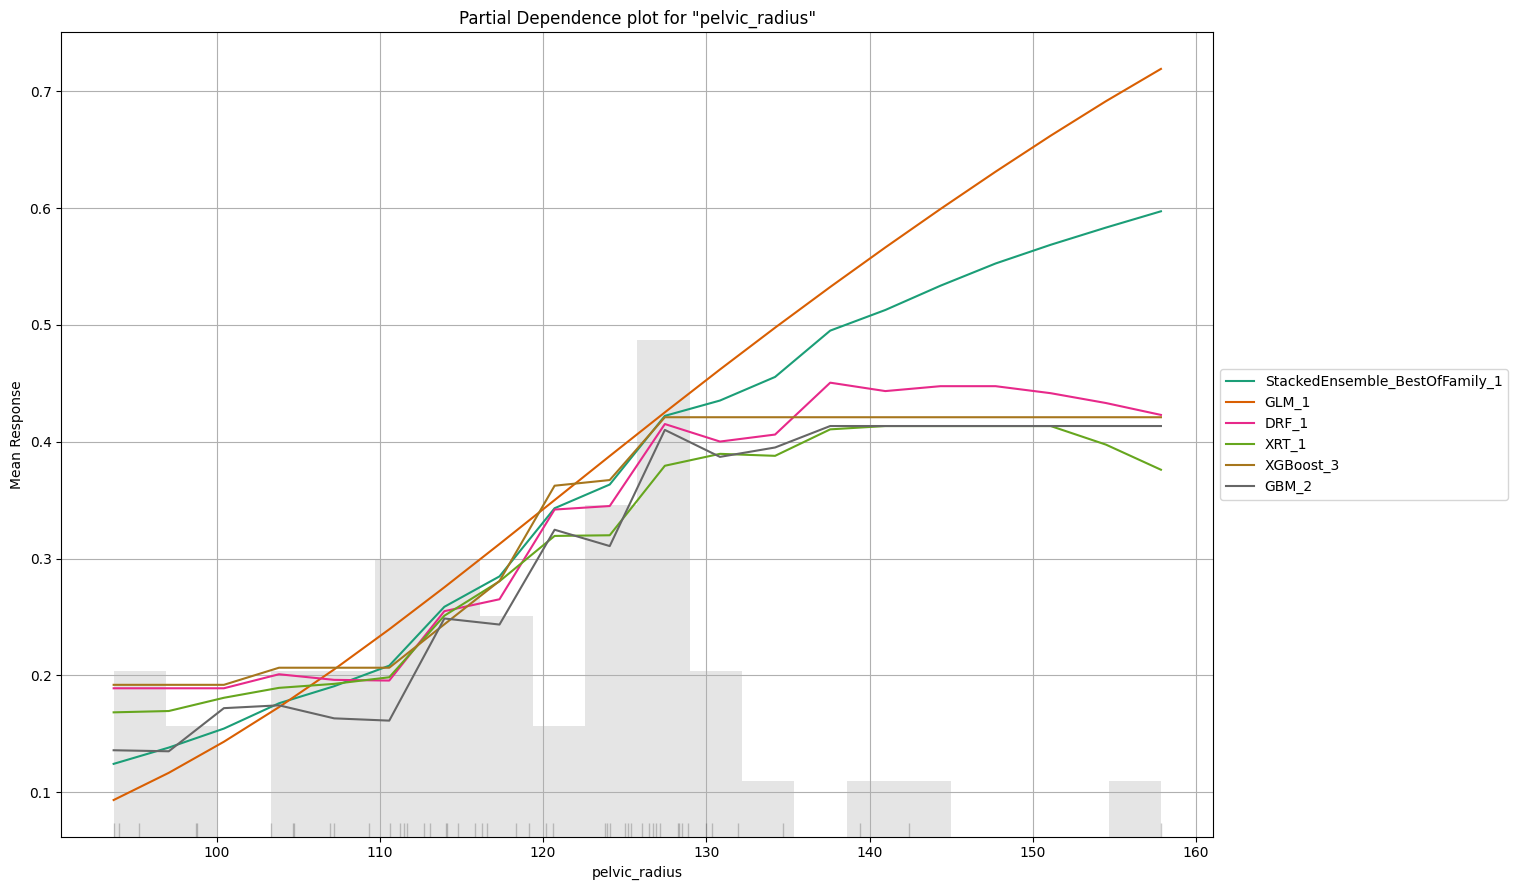

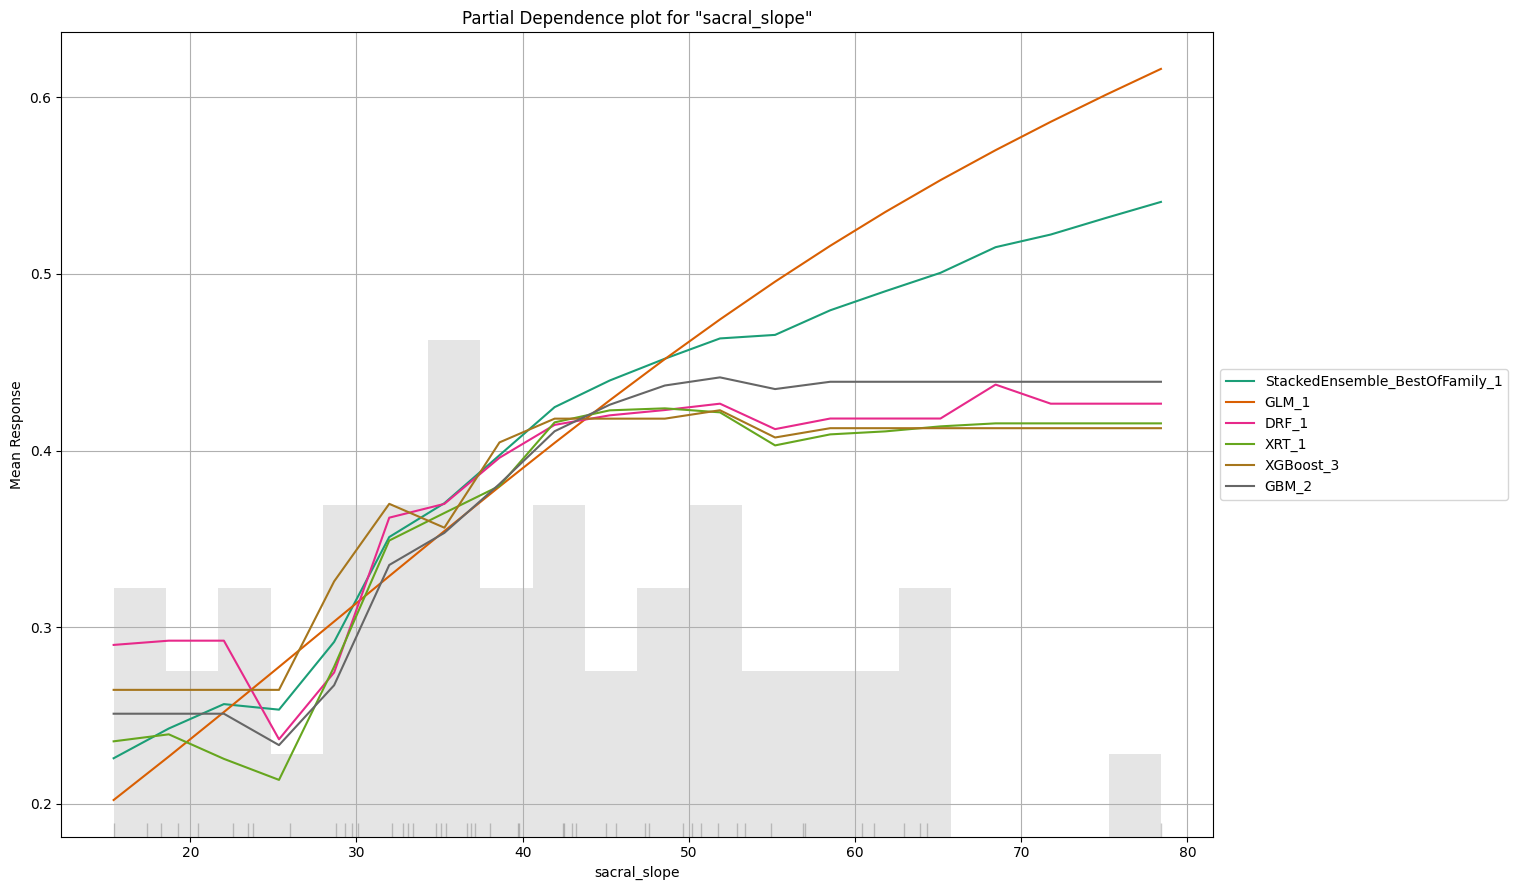

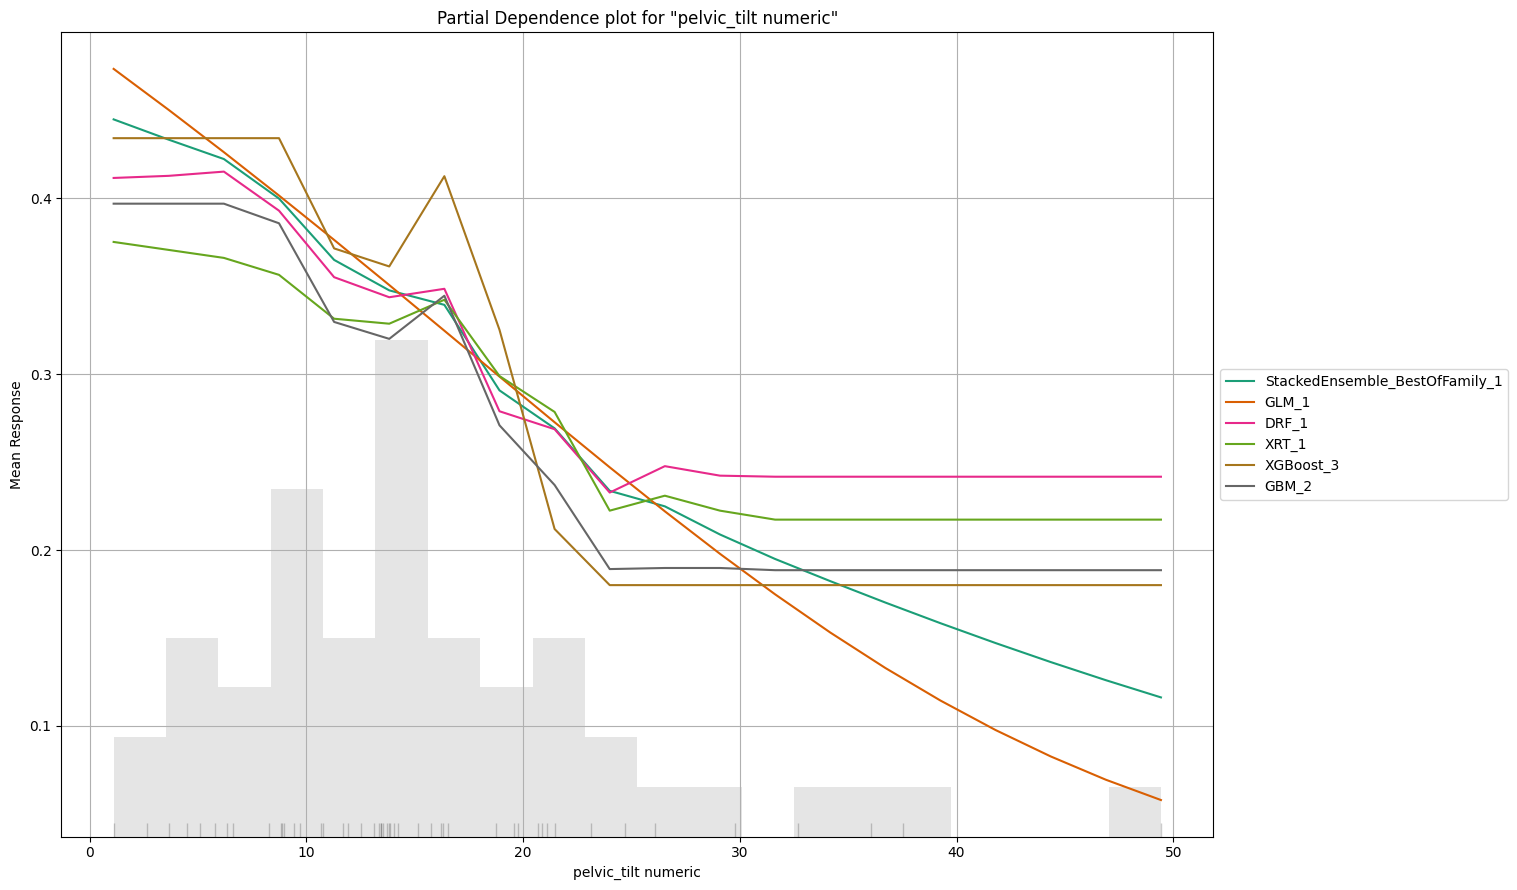

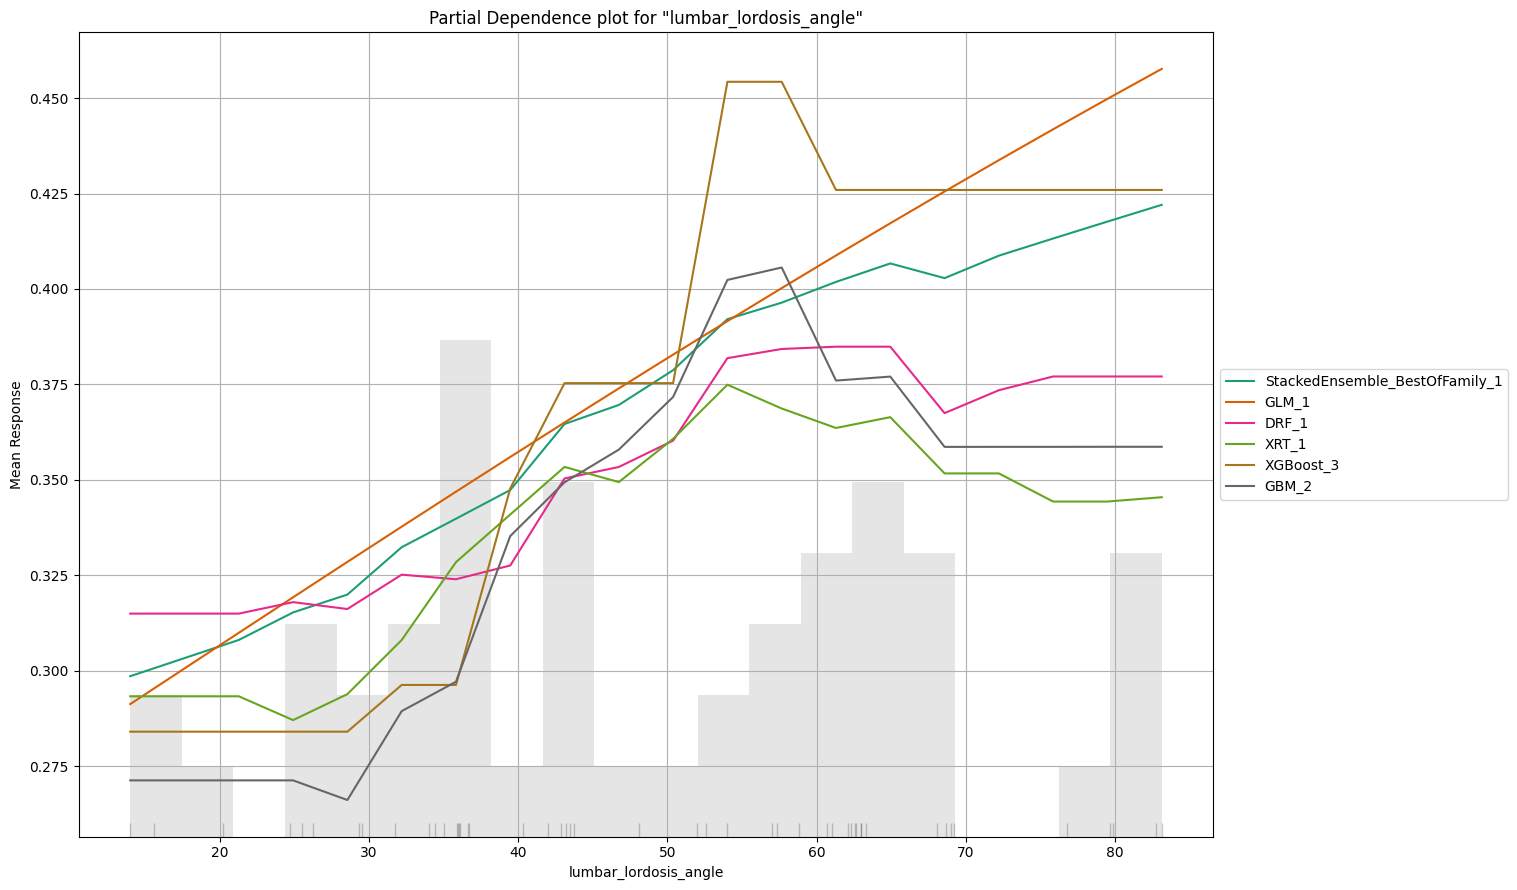

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_1_20230818_110759,0.953177,0.423038,0.936415,0.062709,0.377562,0.142553,280,0.103877,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_110759,0.948161,0.364547,0.937616,0.0794314,0.338325,0.114464,3283,0.457725,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230818_110759,0.944816,0.365232,0.931647,0.0794314,0.337771,0.114089,4001,0.540155,StackedEnsemble
GBM_4_AutoML_1_20230818_110759,0.941472,0.412863,0.923876,0.0986622,0.373112,0.139212,311,0.103409,GBM
DRF_1_AutoML_1_20230818_110759,0.938963,0.388265,0.930234,0.120401,0.356965,0.127424,621,0.093723,DRF
GLM_1_AutoML_1_20230818_110759,0.938127,0.38649,0.929399,0.101171,0.353131,0.124701,120,0.09446,GLM
XRT_1_AutoML_1_20230818_110759,0.938127,0.404082,0.920052,0.0819398,0.361121,0.130408,225,0.096905,DRF
GBM_2_AutoML_1_20230818_110759,0.928094,0.428165,0.918204,0.0986622,0.372811,0.138988,573,0.289761,GBM
XGBoost_2_AutoML_1_20230818_110759,0.928094,0.421829,0.897283,0.0794314,0.373029,0.13915,1303,0.103527,XGBoost
XGBoost_3_AutoML_1_20230818_110759,0.921405,0.434935,0.900773,0.120401,0.376912,0.142063,413,0.08911,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_110759

,Abnormal,Normal,Error,Rate
Abnormal,23.0,3.0,0.1154,(3.0/26.0)
Normal,1.0,22.0,0.0435,(1.0/23.0)
Total,24.0,25.0,0.0816,(4.0/49.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
# explain the model
exm = model.explain(test)
exm

In [ ]:
# import the libraries
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,ConstantKernel, DotProduct, Matern
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score as ras
from sklearn.model_selection import learning_curve

In [ ]:
x = df.drop('class', axis=1).values
y = df['class'].values

In [ ]:
# standardise the feature column and encode the target variable
from sklearn import preprocessing
SS = preprocessing.StandardScaler()
LE = preprocessing.LabelEncoder()
x = SS.fit_transform(x)
y = LE.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Gaussian Process Classifier using RBF kernel
kernel = 1.0 * RBF()
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process Classifier
gpc.fit(x_train, y_train)

# Make predictions on the test set
predictions = gpc.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision_macro = precision_score(y_test, predictions, average='macro')
recall_macro = recall_score(y_test, predictions, average='macro')
f1_macro = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)
# Calculate the negative log-likelihood
y_probs = gpc.predict_proba(x_test)
log_likelihood = log_loss(y_test, y_probs)

Accuracy: 0.8387096774193549
Precision (Macro-average): 0.8097826086956521
Recall (Macro-average): 0.7878787878787878
F1-Score (Macro-average): 0.7973856209150327
Negative Log-Likelihood: 0.28573928196541876
Confusion Matrix:
[[40  4]
 [ 6 12]]


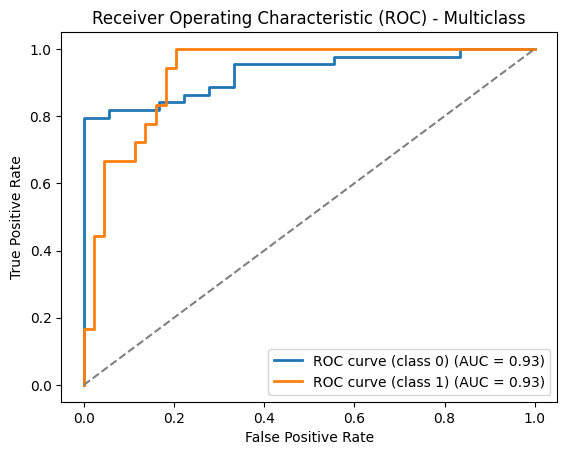

In [ ]:
# Calculate ROC curve and AUC for each class (one-vs-all)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision (Macro-average): {precision_macro}")
print(f"Recall (Macro-average): {recall_macro}")
print(f"F1-Score (Macro-average): {f1_macro}")
print(f"Negative Log-Likelihood: {log_likelihood}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'kernel': [1.0 * RBF(length_scale=ls) for ls in np.logspace(-3, 3, num=10)],
    'n_restarts_optimizer': [0, 1, 2, 3, 4],
    'max_iter_predict': [100, 200, 300, 400, 500]
}

# Initialize the Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    gpc, param_distributions=param_grid, n_iter=20,
    scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Fit the RandomizedSearchCV to your data
random_search.fit(x_train, y_train)

# Get the best parameters and the corresponding model
best_params = random_search.best_params_
best_gpc = random_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_gpc.predict(x_test)

# Print best parameters and accuracy score
print("Best Parameters:", best_params)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'n_restarts_optimizer': 2, 'max_iter_predict': 400, 'kernel': 1**2 * RBF(length_scale=2.15)}
Best Accuracy: 0.846938775510204


In [ ]:
RBF().get_params().keys()

dict_keys(['length_scale', 'length_scale_bounds'])